<a href="https://colab.research.google.com/github/cerasole/EnvironmentalRadioactivity/blob/main/Notebooks/Presenze.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Numero di presenze del corso

In questo Colab, analizziamo l'andamenti del numero di persone che hanno partecipato a questa serie di lezioni relative alla radioattività ambientale.

Le domande cui vogliamo rispondere sono le seguenti.

 - Quale funzione descrive al meglio l'andamento del numero di persone presenti al passare delle lezioni?
 - Quanto valgono i parametri di questa funzione?

Più in generale, questo Colab è un occasione per
 - descrivere il modo che si usa in fisica ed in statistica per affrontare dei problemi di modellizzazione di dati con leggi matematiche
 - applicare questi modi ad un caso semplice, chiaro e che ci riguarda in prima persona


## Step 1 - Visualizzazione dei dati

\\

Cominciamo con importare le librerie necessarie, inserire i dati e fare un primo grafico, usando le informazioni che abbiamo visto nella prima lezione di laboratorio

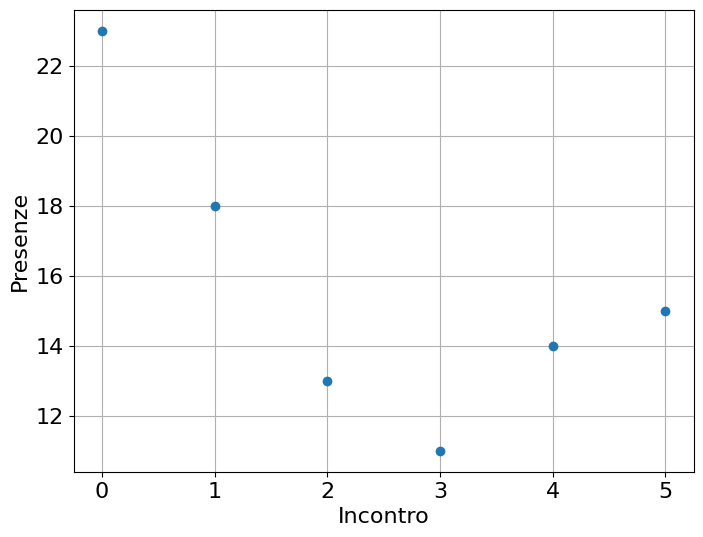

In [1]:
# Importiamo le librerie necessarie
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from mpl_toolkits.mplot3d import Axes3D
plt.rc("font", size = 16)

# Definiamo i dati
presenze = np.array([23, 18, 13, 11, 14, 15])
incontri = np.arange(0, len(presenze))

# Plot
fig, ax = plt.subplots(figsize = (8, 6))
ax.errorbar(incontri, presenze, ls = "None", marker = "o", markersize = 6, capsize = 3)
ax.set_xlabel("Incontro")
ax.set_ylabel("Presenze")
ax.set_xticks(incontri.astype("int"))
ax.grid()

In [2]:
np.mean(presenze), np.std(presenze)

(15.666666666666666, 3.9015666369065416)



## Step 2 - Stima delle incertezze


\\

Consideriamo un universo parallelo in cui nel vostro liceo viene nuovamente proposto questo corso. Quante persone si presenterebbero alla prima lezione?

Nell'universo in cui viviamo, ne sono venute 23.
Però, in eventuali altri, ne sarebbero potuti venire 20, 22, 19, 24, 28...

Analogamente vale per tutte le altre lezioni avvenute nei vari universi paralleli!

Dunque, *come si calcola l'incertezza su un numero di conteggi?*

**Risposta rapida, veloce e approssimata, spesso sufficientemente valida**: *l'incertezza si può approssimare con la radice quadrata del numero di conteggi*.

Questa era la risposta che abbiamo dato nella seconda lezione di laboratorio, durante il quarto incontro.

In linea di principio, questa approssimazione è ben accettabile quando sono verificate due ipotesi:
 - Il numero di conteggi è, approssimativamente, maggiore di 30;
 - Gli eventi sono fra loro indipendenti e nn correlati;

Non è il nostro caso, perchè
 - ci sono stati incontri anche con 11 persone e la media del numero di persone è circa 16
 - i numeri di persone presenti nei vari incontri sono fra loro correlati, sia perchè ci sono state persone che hanno partecipato a tutti gli incontri, sia perchè una persona spera di fare al massimo solo 2 assenze per motivi burocratici.

Proviamo a fare il grafico con quest'approssimazione un po' grossolana senza dubbio sulle incertezze.

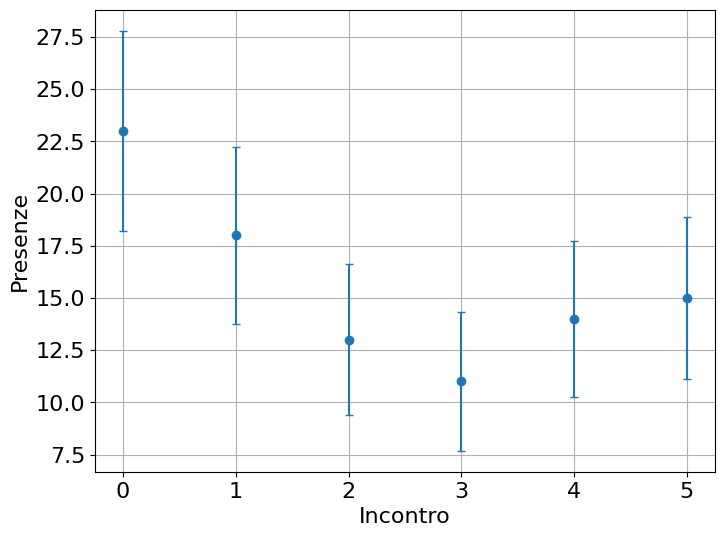

In [3]:
presenze_err = np.sqrt(presenze)

# Plot
fig, ax = plt.subplots(figsize = (8, 6))
ax.errorbar(incontri, presenze, yerr = presenze_err, ls = "None", marker = "o", markersize = 6, capsize = 3)
ax.set_xlabel("Incontro")
ax.set_ylabel("Presenze")
ax.set_xticks(incontri.astype("int"))
ax.grid()

Ad occhio, mi sembra normale che le incertezze siano troppo grandi!

Dopo una lunga riflessione, mi sembra che non possiamo fare altro che decretare che le incertezze siano minori di quelle che si possono ottenere con la stima gaussiana.

L'ipotesi più conservativa che mi verrebbe da fare è assumere un'incertezza costante per ogni punto. Nel caso più conservativo possibile, userei un'incertezza pari ad uno.

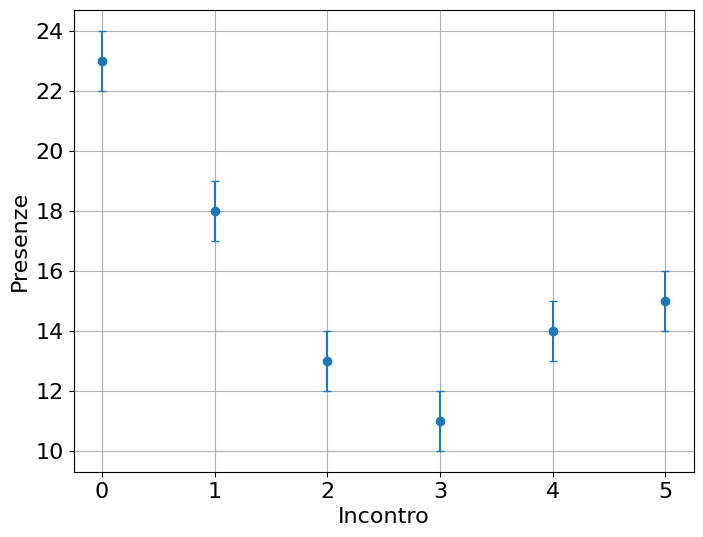

In [4]:
presenze_err = np.ones(len(presenze)) * 1

# Plot
fig, ax = plt.subplots(figsize = (8, 6))
ax.errorbar(incontri, presenze, yerr = presenze_err, ls = "None", marker = "o", markersize = 6, capsize = 3)
ax.set_xlabel("Incontro")
ax.set_ylabel("Presenze")
ax.set_xticks(incontri.astype("int"))
ax.grid()



## Step 3a - Formulazione delle ipotesi sulle leggi matematiche


\\

Questa è la fase in cui dobbiamo guardare il plot e pensare quale legge funzionale può essere usata.

A me ne vengono 3 in mente:

 - una legge costante: $f_1(x; q) = q$
 - un'esponenziale decrescente: $f_2(x; C, \tau) = C × 2^{-x/\tau}$
 - un'esponenziale decrescente più una costante: $f_3(x; C, \tau, q) = C \times 2^{-x/\tau} + q$

Ciascuna di queste funzioni è funzione del *variabile* numero dell'incontro $x$ e dipende da dei *parametri* (indicati nella parentesi della funzione, dopo il punto e virgola):

 - $f_1$ dipende da 1 parametro, ossia $q$
 - $f_2$ dipende da 2 parametri, ossia $C$ e $\tau$
 - $f_3$ dipende da 3 parametri, ossia $C$ e $\tau$ e $q$

Definiamo queste leggi funzionali in Python attraverso delle "funzioni" in Python e vediamo come si usano.

In [190]:
def f_1 (x, q):
  return q * np.ones(len(x))

def f_2 (x, C, tau):
  return C * np.power(2, -x/tau)

#### Esercizio: definite voi f_3, definita come sopra! Chiama i tre parametri C, tau e q
def f_3 (x, C, tau, q):
  return C * np.power(2, -x/tau) + q

color1, color2, color3 = "tab:orange", "tab:red", "tab:green"
ls1, ls2, ls3 = "solid", "dashed", "dashdot"

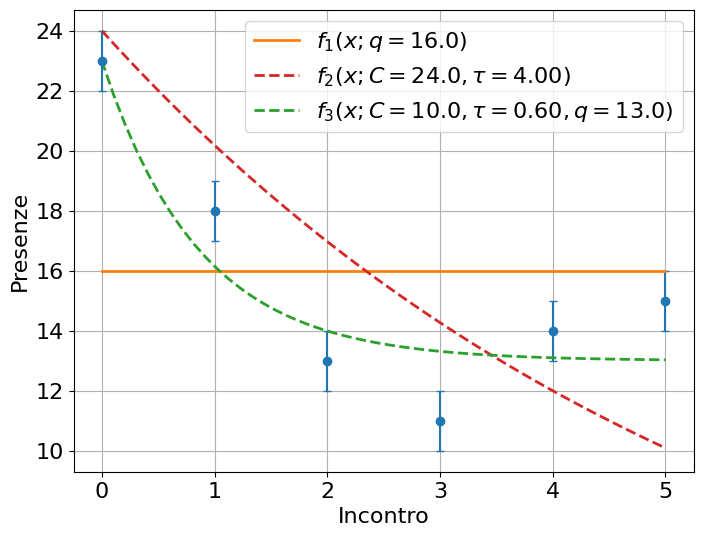

In [191]:
# Plot di prima
fig, ax = plt.subplots(figsize = (8, 6))
ax.errorbar(incontri, presenze, yerr = presenze_err, ls = "None", marker = "o", markersize = 6, capsize = 3)
ax.set_xlabel("Incontro")
ax.set_ylabel("Presenze")
ax.set_xticks(incontri.astype("int"))
ax.grid()

# Griglia delle variabili su cui verranno calcolate le funzioni
x = np.linspace(0, incontri[-1])

lw = 2

# Plot delle funzioni con valori ragionevoli dei parametri

# f_1
_q = 16
ax.plot(x, f_1(x, q = _q), ls = ls1, lw = lw, label = "$f_1(x; q = %.1f)$" % _q, color = color1)

# f_2
_C = 24
_tau = 4
ax.plot(x, f_2(x, C = _C, tau = _tau), ls = ls2, lw = lw, label = "$f_2(x; C = %.1f, \\tau = %.2f)$" % (_C, _tau), color = color2)

# f_3
_C = 10
_tau = 0.6
_q = 13
ax.plot(x, f_3(x, C = _C, tau = _tau, q = _q), ls = ls2, lw = lw, label = "$f_3(x; C = %.1f, \\tau = %.2f, q = %.1f)$" % (_C, _tau, _q), color = color3)

# Legenda
ax.legend();



## Step 3b - Qual è il significato fisico di queste leggi funzionali, nel nostro caso?



\\

La domanda qui è per voi.



## Step 4a - Fit con $f_1$

\\

Partiamo con la funzione più semplice, ossia $f_1$. In base a quale valore viene affidato al parametro $q$, questa funzione può descrivere meglio o peggio i dati.

 Se $q=100$, la descriverebbe molto male!
 Se $q=16$, la descriverebbe molto meglio!

Come posso *quantificare questo meglio o peggio*?

Si utilizza una quantità chiamata $\chi^2$ (chi-quadrato), che rappresenta la somma dei quadrati delle differenze fra i dati reali $y$ e le predizioni del  modello $f(x)$, in unità delle incertezze $\sigma$ sui dati:

$\chi^2 = \sum_{i=1}^{N} \left( \frac{ y_i - f(x_i)} {\sigma_i}\right)^2$

Questa quantità rappresenta quanto il modello descrive bene i dati:

 - se i dati $y$ sono ben descritti dal modello $f(x)$, allora $y \approx f(x) → \chi^2 \approx 0$
 - se i dati $y$ sono descritti male dal modello $f(x)$, allora $y - f(x)$ sarà relativamente grande e, poichè $\chi^2$ è somma di valori tutti positivi perchè elevati al quadrato, il $\chi^2$ sarà elevato.

In questo caso, poichè $f(x) = f_1(x; p)$, allora il valore di $\chi^2$ dipenderà dal valore di $p$:

$\chi^2 (p) = \sum_{i=1}^{N} \left( \frac{ y_i - f(x_i; p)} {\sigma_i}\right)^2$

Dunque sarà una semplice funzione di una variabile, ossia $p$.

La calcoliamo subito.

In [18]:
def chi_square (x, y, sigma, f, *params):
  return np.sum( ((y - f(x, *params) ) / sigma)**2 , axis = 0)

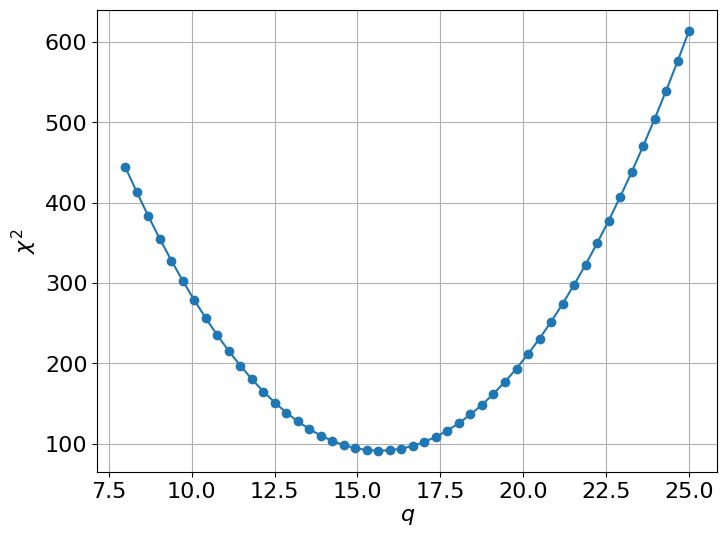

In [19]:
# Calcolo del chi^2
_q_vec = np.linspace(8, 25)
chi_1 = np.zeros(len(_q_vec))
for i, _q in enumerate(_q_vec):
  chi_1[i] = chi_square(incontri, presenze, presenze_err, f_1, _q)

# Plot
fig, ax = plt.subplots(figsize = (8, 6))
ax.errorbar(_q_vec, chi_1, marker = "o", markersize = 6, capsize = 3)
ax.set_xlabel("$q$")
ax.set_ylabel("$\chi^2$")
ax.grid();

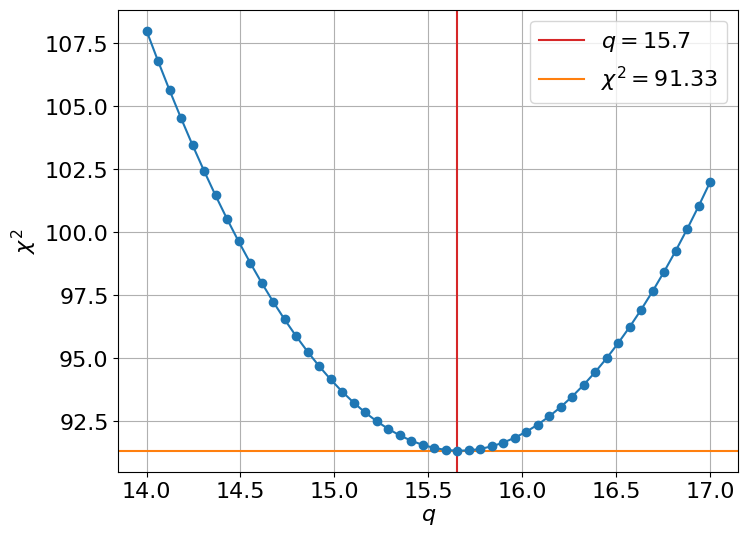

In [20]:
_q_vec = np.linspace(14, 17)
chi_1 = np.zeros(len(_q_vec))
for i, _q in enumerate(_q_vec):
  chi_1[i] = chi_square(incontri, presenze, presenze_err, f_1, _q)

# Plot
fig, ax = plt.subplots(figsize = (8, 6))
ax.errorbar(_q_vec, chi_1, marker = "o", markersize = 6, capsize = 3)
ax.set_xlabel("$q$")
ax.set_ylabel("$\chi^2$")
ax.grid()

min_chi1 = np.min(chi_1)
_q_min = _q_vec[np.argmin(chi_1)]
ax.axvline(_q_min, label = "$q = %.1f$" % _q_min, color = "tab:red")
ax.axhline(min_chi1, label = "$\chi^2 = %.2f$" % min_chi1, color = "tab:orange", ls = "solid")
ax.legend();

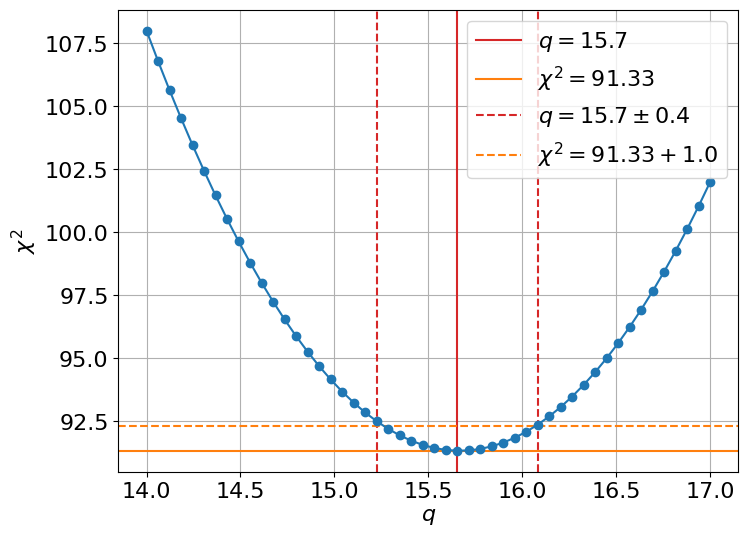

In [21]:
chi_square_increment = 1.
_q_min_err = np.abs(_q_min - _q_vec[np.argmin(np.abs(chi_1 - (min_chi1 + chi_square_increment)))])

# Plot
fig, ax = plt.subplots(figsize = (8, 6))
ax.errorbar(_q_vec, chi_1, marker = "o", markersize = 6, capsize = 3)
ax.set_xlabel("$q$")
ax.set_ylabel("$\chi^2$")
ax.grid()

min_chi1 = np.min(chi_1)
_q_min = _q_vec[np.argmin(chi_1)]
ax.axvline(_q_min, label = "$q = %.1f$" % _q_min, color = "tab:red")
ax.axhline(min_chi1, label = "$\chi^2 = %.2f$" % min_chi1, color = "tab:orange", ls = "solid")

ax.axvline(_q_min - _q_min_err, ls = "dashed", color = "tab:red", label = "$q = %.1f \pm %.1f$" % (_q_min, _q_min_err))
ax.axvline(_q_min + _q_min_err, ls = "dashed", color = "tab:red")
ax.axhline(min_chi1 + chi_square_increment, label = "$\chi^2 = %.2f + %.1f$" % (min_chi1, chi_square_increment), color = "tab:orange", ls = "dashed")
ax.legend();

In [22]:
!pip install iminuit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 8.6 MB/s eta 0:00:00


In [151]:
from iminuit import Minuit
from iminuit.cost import LeastSquares

lsq1 = LeastSquares (incontri, presenze, presenze_err, f_1)
m1 = Minuit(lsq1, q = 16)
m1.migrad()
m1.hesse()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 91.33 (χ²/ndof = 18.3)     │              Nfcn = 16               │
│ EDM = 1.9e-19 (Goal: 0.0002)     │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ q    │   15.7    │    0.4    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────┐
│   │     q │
├───┼───────┤
│ q │ 0.167 │
└───┴───────┘

In [152]:
min_chi1 / (len(incontri) - 1)

18.26688879633486

Text(0.5, 0, 'Incontro')

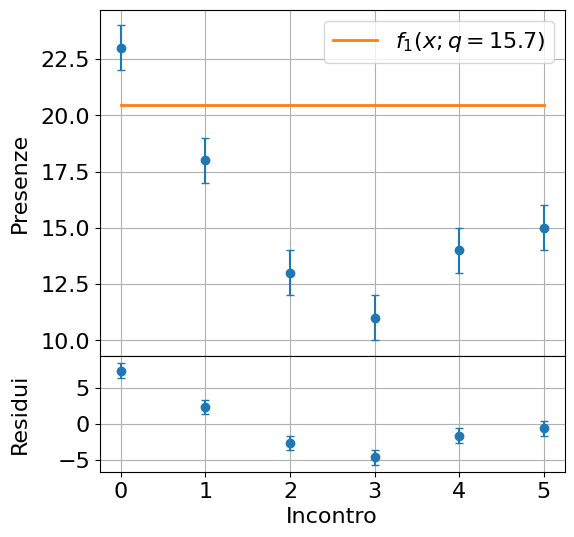

In [179]:
f = f_1
m = m1
figize = (6, 6)

fig, axs = plt.subplots(2, 1, figsize = figsize, gridspec_kw={"height_ratios":[3, 1]}, sharex = True)
fig.subplots_adjust(hspace = 0)

ax = axs[0]
ax.yaxis.set_label_coords(-0.15, 0.5)
ax.errorbar(incontri, presenze, yerr = presenze_err, ls = "None", marker = "o", markersize = 6, capsize = 3)
ax.set_ylabel("Presenze")
ax.set_xticks(incontri.astype("int"))
ax.grid()

x = np.linspace(0, incontri[-1])
lw = 2

# f_1
ax.plot(x, f(x, q = _q), ls = "solid", lw = lw, label = "$f_1(x; q = %.1f)$" % m.values[0])

# Legenda
ax.legend();

ax = axs[1]
ax.yaxis.set_label_coords(-0.15, 0.5)
residui = (presenze - f(incontri, *m.values)) / presenze_err
ax.errorbar(
    incontri,
    residui,
    yerr = np.ones(len(presenze)),
    ls = "None", marker = "o", markersize = 6, capsize = 3
)
ax.grid()
ax.set_ylim(residui.min()-2, residui.max()+2)
ax.set_ylabel("Residui")
ax.set_xlabel("Incontro")


## Step 4b - Fit con $f_2$


\\

.

In [34]:
C_vec, tau_vec = np.arange(12, 28, 0.1), np.arange(1, 15, 0.1)

n, m = len(C_vec), len(tau_vec)
chi_2 = np.zeros((n, m))

for i in range(n):
  for j in range(m):
    chi_2[i, j] = chi_square(incontri, presenze, presenze_err, f_2, C_vec[i], tau_vec[j])

In [80]:
chi_2_min = chi_2.min()
C_best, tau_best = C_vec[np.where(chi_2 == chi_2.min())[0]], tau_vec[np.where(chi_2 == chi_2.min())[1]]
C_best, tau_best

(array([20.5]), array([6.]))

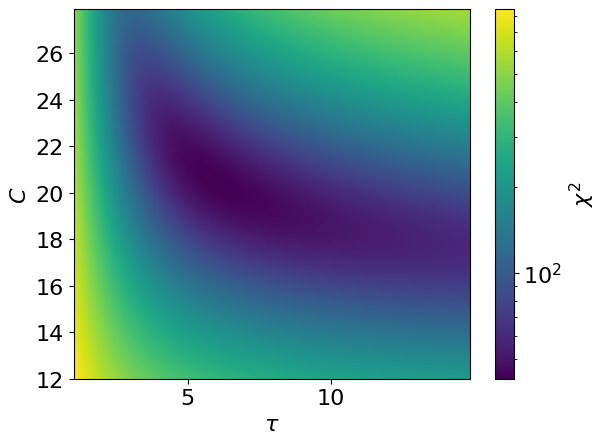

In [81]:
plt.imshow(chi_2, origin = "lower", extent = [tau_vec[0], tau_vec[-1], C_vec[0], C_vec[-1]], aspect = "auto", norm=LogNorm(vmin=chi.min(), vmax=chi.max()))
cbar = plt.colorbar()
plt.xlabel("$\\tau$")
plt.ylabel("$C$")
cbar.set_label("$\chi^2$")

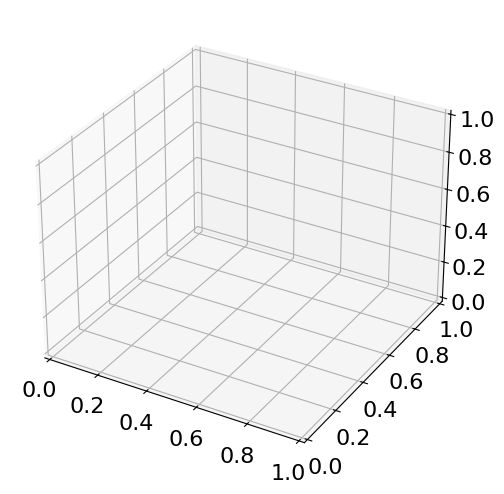

In [82]:
fig, ax = plt.subplots(figsize = (8, 6), subplot_kw={"projection":"3d"})

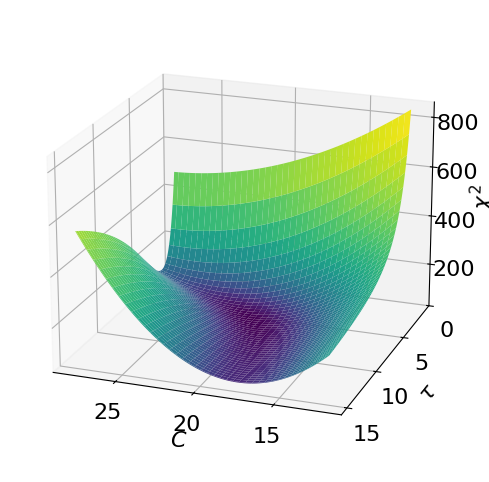

In [83]:
fig, ax = plt.subplots(figsize = (12, 6), subplot_kw={"projection":"3d"})
_C_vec, _tau_vec = np.meshgrid(C_vec, tau_vec, indexing="ij")
ax.plot_surface(_C_vec, _tau_vec, chi_2, cmap = "viridis", norm=LogNorm(vmin=chi.min(), vmax=chi.max()))
ax.set_xlabel("$C$")
ax.set_ylabel("$\\tau$")
ax.set_zlabel("$\chi^2$")
ax.view_init(elev=20, azim=110, roll=0);

(array([20.5]), array([6.]))

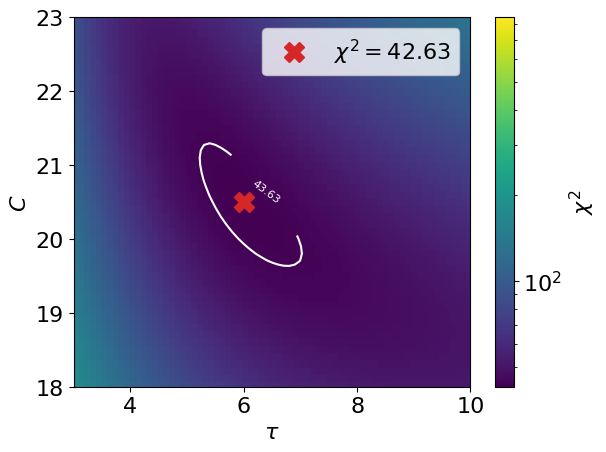

In [79]:
plt.imshow(chi_2, origin = "lower", extent = [tau_vec[0], tau_vec[-1], C_vec[0], C_vec[-1]], aspect = "auto", norm=LogNorm(vmin=chi_2.min(), vmax=chi_2.max()))
cbar = plt.colorbar()
plt.plot(tau_best, C_best, marker = "X", markersize = 14, color = "tab:red", label = "$\chi^2 = %.2f$" % chi_2_min, ls="None")
C = plt.contour(_tau_vec, _C_vec, chi_2, levels = [chi_2_min+1], colors = ["white"])
plt.clabel(C, fontsize=8)
plt.legend()
plt.xlim(3, 10)
plt.ylim(18, 23)
plt.xlabel("$\\tau$")
plt.ylabel("$C$")
cbar.set_label("$\chi^2$")

In [113]:
mask = chi_2 <= chi_2_min + 1
C_low, C_high, tau_low, tau_high = _C_vec[mask].min(), _C_vec[mask].max(), _tau_vec[mask].min(), _tau_vec[mask].max()
C_low, C_best[0], C_high, tau_low, tau_best[0], tau_high

(19.699999999999974,
 20.49999999999997,
 21.199999999999967,
 5.300000000000004,
 6.000000000000004,
 7.000000000000005)

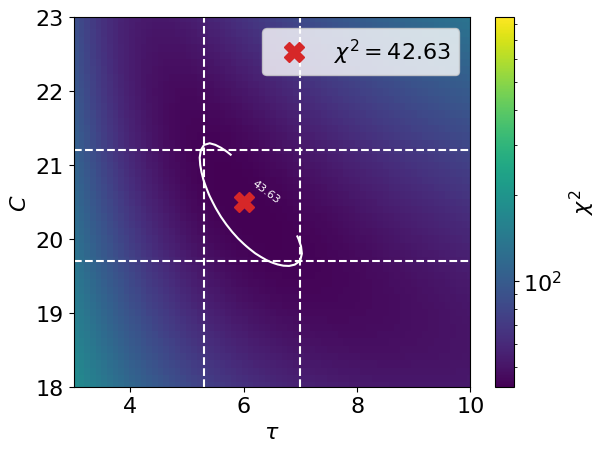

In [110]:
plt.imshow(chi_2, origin = "lower", extent = [tau_vec[0], tau_vec[-1], C_vec[0], C_vec[-1]], aspect = "auto", norm=LogNorm(vmin=chi_2.min(), vmax=chi_2.max()))
cbar = plt.colorbar()
plt.plot(tau_best, C_best, marker = "X", markersize = 14, color = "tab:red", label = "$\chi^2 = %.2f$" % chi_2_min, ls="None")
C = plt.contour(_tau_vec, _C_vec, chi_2, levels = [chi_2_min+1], colors = ["white"])
plt.clabel(C, fontsize=8)
plt.legend()
plt.xlim(3, 10)
plt.ylim(18, 23)
plt.xlabel("$\\tau$")
plt.ylabel("$C$")
cbar.set_label("$\chi^2$")

plt.axhline(C_low, ls = "dashed", color = "white")
plt.axhline(C_high, ls = "dashed", color = "white")
plt.axvline(tau_low, ls = "dashed", color = "white")
plt.axvline(tau_high, ls = "dashed", color = "white");

In [114]:
C_err_low = C_best[0] - C_low
C_err_high = C_high - C_best[0]
tau_err_low = tau_best[0] - tau_low
tau_err_high = tau_high - tau_best[0]

In [115]:
C_err_low, C_best[0], C_err_high, tau_err_low, tau_best[0], tau_err_high

(0.7999999999999972,
 20.49999999999997,
 0.6999999999999957,
 0.7000000000000002,
 6.000000000000004,
 1.0000000000000009)

Dunque, i valori di best-fit trovati sono
 - $C = 20.5_{-0.8}^{+0.7}$
 - $\tau = 6_{-0.7}^{+1.0}$

Proviamo a vedere cosa trova Minuit

In [147]:
lsq2 = LeastSquares(incontri, presenze, presenze_err, f_2)
m2 = Minuit(lsq2, C = 20, tau = 6)
m2.migrad()
m2.hesse()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 42.62 (χ²/ndof = 10.7)     │              Nfcn = 39               │
│ EDM = 9.52e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ C    │   20.5    │    0.8    │            │            │         │         │       │
│ 1 │ tau  │    6.0    │    0.9    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌─────┬─────────────┐
│     │     C   tau │
├─────┼─────────────┤
│   C │ 0.687  -0.6 │
│ tau │  -0.6 0.773 │
└─────┴─────────────┘

In [148]:
m2.values, m2.errors, m2.fval, m2.fval/m2.ndof

(<ValueView C=20.465031334032943 tau=5.988620145086801>,
 <ErrorView C=0.8289866519839365 tau=0.8791290262998208>,
 42.62340889852357,
 10.655852224630893)

In [149]:
m2.covariance

┌─────┬─────────────┐
│     │     C   tau │
├─────┼─────────────┤
│   C │ 0.687  -0.6 │
│ tau │  -0.6 0.773 │
└─────┴─────────────┘

Text(0.5, 0, 'Incontro')

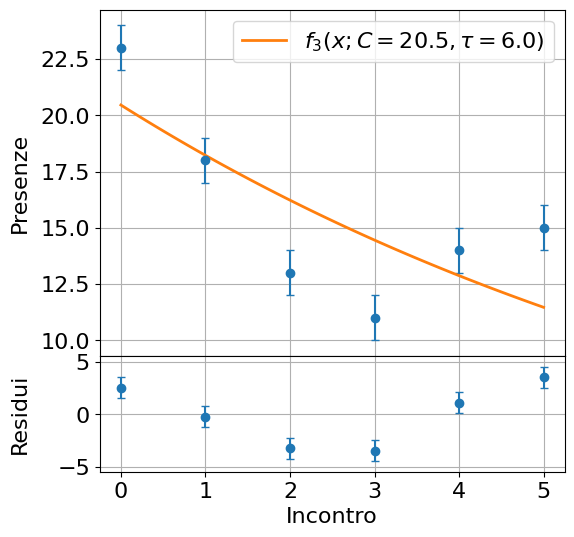

In [185]:
f = f_2
m = m2
figsize = (6, 6)

fig, axs = plt.subplots(2, 1, figsize = figsize, gridspec_kw={"height_ratios":[3, 1]}, sharex = True)
fig.subplots_adjust(hspace = 0)

ax = axs[0]
ax.yaxis.set_label_coords(-0.15, 0.5)
ax.errorbar(incontri, presenze, yerr = presenze_err, ls = "None", marker = "o", markersize = 6, capsize = 3)
ax.set_ylabel("Presenze")
ax.set_xticks(incontri.astype("int"))
ax.grid()

x = np.linspace(0, incontri[-1])
lw = 2

ax.plot(x, f(x, *m.values), ls = "solid", lw = lw, label = "$f_3(x; C = %.1f, \\tau = %.1f)$" % (m.values[0], m.values[1]))

# Legenda
ax.legend();

ax = axs[1]
ax.yaxis.set_label_coords(-0.15, 0.5)
residui = (presenze - f(incontri, *m.values)) / presenze_err
ax.errorbar(
    incontri,
    residui,
    yerr = np.ones(len(presenze)),
    ls = "None", marker = "o", markersize = 6, capsize = 3
)
ax.grid()
ax.set_ylim(residui.min()-2, residui.max()+2)
ax.set_ylabel("Residui")
ax.set_xlabel("Incontro")

## Step 4c - Fit con $f_3$



In [145]:
lsq3 = LeastSquares(incontri, presenze, presenze_err, f_3)
m3 = Minuit(lsq3, C = 16, tau = 1, q = 12)
m3.migrad()
m3.hesse()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 14.05 (χ²/ndof = 4.7)      │              Nfcn = 94               │
│ EDM = 1.9e-06 (Goal: 0.0002)     │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ C    │   10.1    │    1.2    │            │            │         │         │       │
│ 1 │ tau  │   0.63    │   0.15    │            │            │         │         │       │
│ 2 │ q    │   13.1    │    0.6    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌─────┬──────────────────────┐
│     │      C    tau      q │
├─────┼──────────────────────┤
│   C │   1.36  0.024   -0.4 │
│ tau │  0.024 0.0232 -0.056 │
│   q │   -0.4 -0.056  0.387 │
└─────┴──────────────────────┘

In [186]:
m3.values, m3.errors, m3.fval, m3.fval/m3.ndof

(<ValueView C=10.14774935192015 tau=0.6349930256530062 q=13.124840544210599>,
 <ErrorView C=1.1647950238585578 tau=0.15236836384773814 q=0.6220732513210564>,
 14.046485844523946,
 4.682161948174649)

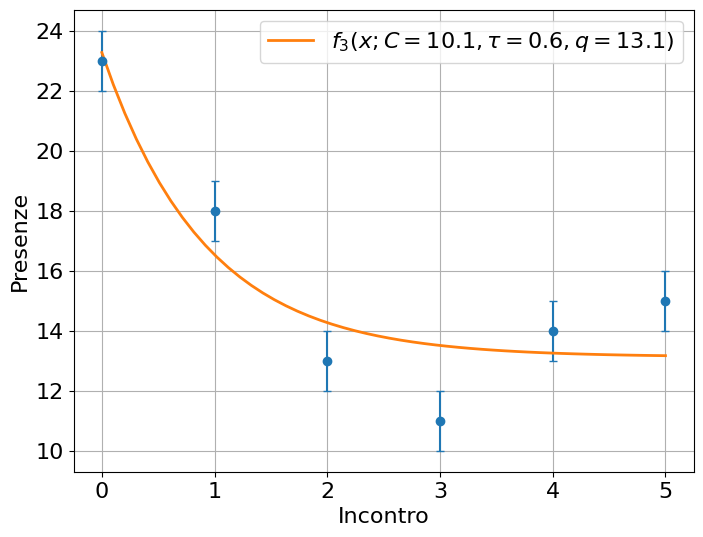

In [146]:
# Plot di prima
fig, ax = plt.subplots(figsize = (8, 6))
ax.errorbar(incontri, presenze, yerr = presenze_err, ls = "None", marker = "o", markersize = 6, capsize = 3)
ax.set_xlabel("Incontro")
ax.set_ylabel("Presenze")
ax.set_xticks(incontri.astype("int"))
ax.grid()

# Griglia delle variabili su cui verranno calcolate le funzioni
x = np.linspace(0, incontri[-1])

lw = 2

# f_3
ax.plot(x, f_3(x, *m3.values), ls = "solid", lw = lw, label = "$f_3(x; C = %.1f, \\tau = %.1f, q = %.1f)$" % (m3.values[0], m3.values[1], m3.values[2]))

# Legenda
ax.legend();

Text(0.5, 0, 'Incontro')

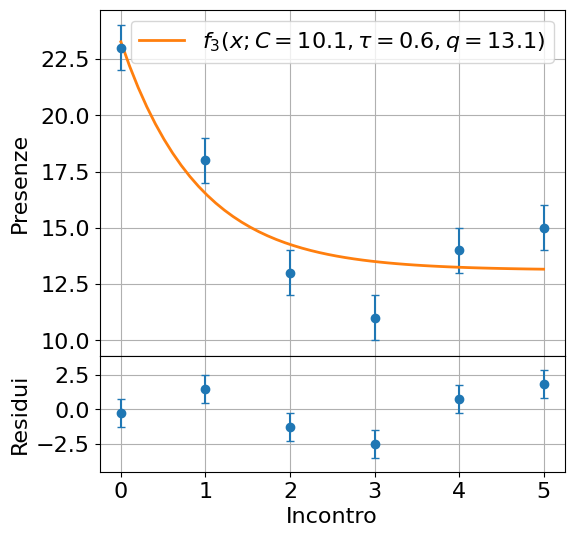

In [184]:
f = f_3
m = m3
figsize = (6, 6)

fig, axs = plt.subplots(2, 1, figsize = figsize, gridspec_kw={"height_ratios":[3, 1]}, sharex = True)
fig.subplots_adjust(hspace = 0)

ax = axs[0]
ax.yaxis.set_label_coords(-0.15, 0.5)
ax.errorbar(incontri, presenze, yerr = presenze_err, ls = "None", marker = "o", markersize = 6, capsize = 3)
ax.set_ylabel("Presenze")
ax.set_xticks(incontri.astype("int"))
ax.grid()

x = np.linspace(0, incontri[-1])
lw = 2

ax.plot(x, f(x, *m.values), ls = "solid", lw = lw, label = "$f_3(x; C = %.1f, \\tau = %.1f, q = %.1f)$" % (m.values[0], m.values[1], m.values[2]))

# Legenda
ax.legend();

ax = axs[1]
ax.yaxis.set_label_coords(-0.15, 0.5)
residui = (presenze - f(incontri, *m.values)) / presenze_err
ax.errorbar(
    incontri,
    residui,
    yerr = np.ones(len(presenze)),
    ls = "None", marker = "o", markersize = 6, capsize = 3
)
ax.grid()
ax.set_ylim(residui.min()-2, residui.max()+2)
ax.set_ylabel("Residui")
ax.set_xlabel("Incontro");

## Step 4d - Recap dei fit e determinazione della migliore legge funzionale

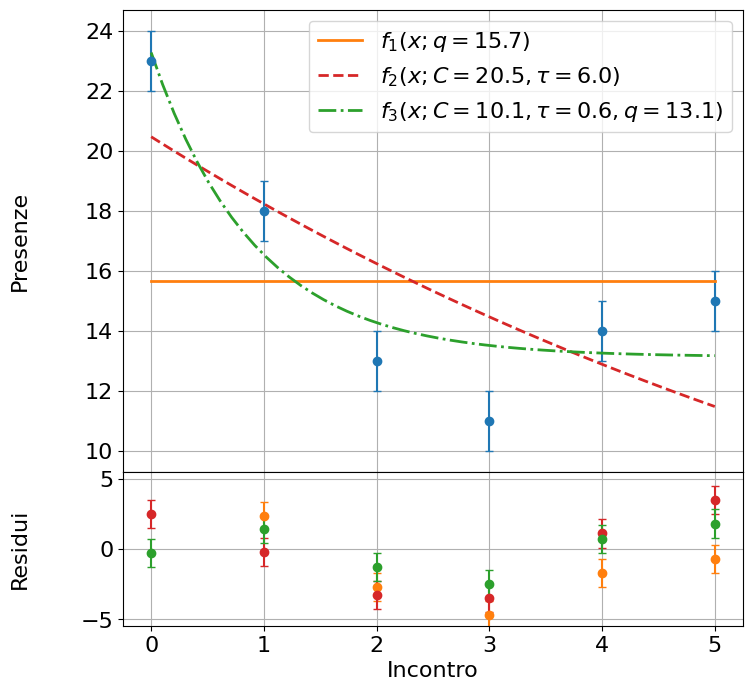

In [194]:
figsize = (8, 8)

fig, axs = plt.subplots(2, 1, figsize = figsize, gridspec_kw={"height_ratios":[3, 1]}, sharex = True)
fig.subplots_adjust(hspace = 0)

ax = axs[0]
ax.yaxis.set_label_coords(-0.15, 0.5)
ax.errorbar(incontri, presenze, yerr = presenze_err, ls = "None", marker = "o", markersize = 6, capsize = 3)
ax.set_ylabel("Presenze")
ax.set_xticks(incontri.astype("int"))
ax.grid()

x = np.linspace(0, incontri[-1])
lw = 2

ax.plot(x, f_1(x, *m1.values), ls = ls1, lw = lw, label = "$f_1(x; q = %.1f)$" % m1.values[0], color = color1)
ax.plot(x, f_2(x, *m2.values), ls = ls2, lw = lw, label = "$f_2(x; C = %.1f, \\tau = %.1f)$" % (m2.values[0], m2.values[1]), color = color2)
ax.plot(x, f_3(x, *m3.values), ls = ls3, lw = lw, label = "$f_3(x; C = %.1f, \\tau = %.1f, q = %.1f)$" % (m3.values[0], m3.values[1], m3.values[2]), color = color3)

# Legenda
ax.legend();

ax = axs[1]
ax.yaxis.set_label_coords(-0.15, 0.5)

ax.set_ylim(residui.min()-2, residui.max()+2)

ax.errorbar(
    incontri,
    (presenze - f_1(incontri, *m1.values)) / presenze_err,
    yerr = np.ones(len(presenze)),
    ls = "None", marker = "o", markersize = 6, capsize = 3, color = color1
)
ax.errorbar(
    incontri,
    (presenze - f_2(incontri, *m2.values)) / presenze_err,
    yerr = np.ones(len(presenze)),
    ls = "None", marker = "o", markersize = 6, capsize = 3, color = color2
)
ax.errorbar(
    incontri,
    (presenze - f_3(incontri, *m3.values)) / presenze_err,
    yerr = np.ones(len(presenze)),
    ls = "None", marker = "o", markersize = 6, capsize = 3, color = color3
)

ax.grid()
ax.set_ylabel("Residui")
ax.set_xlabel("Incontro");

## Appendice A - Analisi più dettagliata che pensavo fosse ragionevole, ma in realtà non siamo nelle ipotesi di statistica poissoniana perchè le prove ripetute **non** sono indipendenti.

Nella seconda lezione di laboratorio, abbiamo visto la distribuzione binomiale: date $N$ ripetizioni indipendenti di un evento, tali che in ciascuna ripetizione c'è una probabilità $p$ che una certa condizione si verifichi, la probabilità che il numero di volte

Avevamo applicato ciò al caso del calcolo delle probabilità del numero di volte $x$ in cui si verifica l'evento "esce il numero 2" (in una singola ripetizione, ciò avviene con probabilità $p=\frac{1}{6}$) se lancio un dado N = 10 volte.

La distribuzione di probabilità binomiale è

$B_N(x)=\frac{N!}{x! (N-x)!} p^{x} (1-p)^{N-x}$

Quando capita invece che il numero di eventi è molto grande ($N→∞$) e, per ciascuno di questi, la probabilità che l'evento accada è molto piccola ($p→0$), però l'effetto è comunque apprezzabile in media $\lambda=Np$ volte, allora la distribuzione di probabilità è quella di Poisson

$P(x; \lambda)=\frac{\lambda^{x}}{x!} e^{-\lambda}$

In questo caso, la vostra scuola ha circa $N\sim1000$ studenti che avrebbero potuto seguire la prima lezione di questo corso, in linea di principio. Per ciascuno di questi, la probabilità è evidentemente piccola, però il numero di persone che si è effettivamente verificato è $x_1=23$ per il primo incontro, $x_i$ per l'i-esimo.

$L = \prod_{i=1}^{N} P(x_i; \lambda_i)$

Io voglio testare una relazione funzionale per la dipendenza di $\lambda = \lambda(x_i)$

In [ ]:
import math

def poisson (x, l):
    return l**x * np.exp(-l) / math.factorial(x)

def likelihood_f1 (presenze, incontri, f, q):
    return np.prod(np.array([poisson(presenze[i], f(incontri[i], q)) for i in range(len(presenze))]))

In [ ]:
_q_vec = np.linspace(10, 20)
likelihood_1 = np.array(
    [ likelihood_f1(presenze, incontri, f_1, _q) for _q in _q_vec ]
)

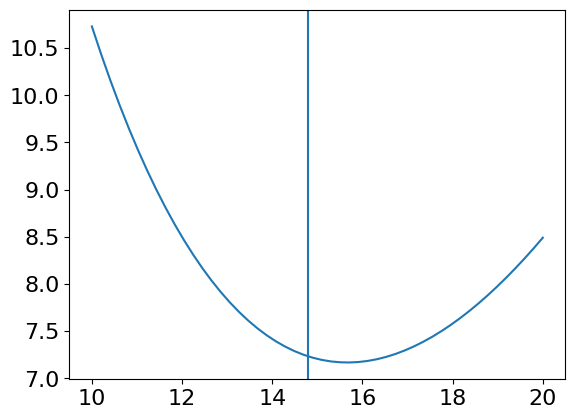

In [ ]:
plt.plot(_q_vec, -np.log10(likelihood_1))
#plt.yscale("log")
plt.axvline(14.8)

E quindi questo si può minimizzare come prima.

Infatti, se si costruisce la funzione di likelihood con statistica gaussiana, si dimostra che ciò è equivalente all'uso della minimizzazione del chi quadrato, che è ciò che abbiamo fatto nel Colab.

Quindi, diciamo che questa parte serve a comprendere da dove nasce il metodo del chi quadrato.